<a href="https://colab.research.google.com/github/PhilanderAH/EDAB_Files/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDAB 2724 Assignment 2**
#####Alicia Philander
##Performing an exploratory data analysis (EDA) on a subsistence retail dataset from Soweto.

Source : https://www.data-in-brief.com/article/S2352-3409(22)00304-3/fulltext
<br/>
<br/>
Link to my : [Report](https://lookerstudio.google.com/s/rWHOAVxJc5c)

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

##**Import Dataset**

In [2]:
#for easier access to the datasets I uploaded them to a gitHub repository
data = pd.read_csv('https://raw.githubusercontent.com/PhilanderAH/EDAB_Files/refs/heads/main/Subsistence_Retail_Consumer_Data.csv')

##**Understand the Dataset**

In [3]:
data.head()

,Gender,Age,Marital Status,Employment Status,Level of Education,Regular Customer,Shopping frequency,E1,E2,E3,...,CT5,CT6,CT7,PV1,PV2,PV3,PI1,PI2,PI3,PI4
0,3,4,1,1,4,2,3,3,2,4,...,3,2,4,2,4,4,3,4,4,4
1,3,5,3,1,4,1,1,3,3,3,...,2,4,3,2,3,2,4,4,4,4
2,2,4,2,2,2,2,2,3,4,2,...,2,4,1,2,3,1,3,3,4,3
3,1,3,1,1,3,2,1,3,2,4,...,2,3,4,1,2,3,3,4,3,4
4,3,2,1,2,2,2,3,2,4,3,...,2,4,2,2,4,2,2,3,2,3


In [4]:
data.shape

(281, 41)

In [5]:
#Get a better view of the columns
data.columns

Index(['Gender', 'Age', 'Marital Status', 'Employment Status',
       'Level of Education', 'Regular Customer', 'Shopping frequency', 'E1',
       'E2', 'E3', 'E4', 'C1', 'C2', 'C3', 'PS1', 'PS2', 'PS3', 'PE1', 'PE2',
       'PE3', 'PE4', 'PE5', 'PE6', 'PPQ1', 'PPQ2', 'PPQ3', 'PPQ4', 'CT1',
       'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'CT7', 'PV1', 'PV2', 'PV3', 'PI1',
       'PI2', 'PI3', 'PI4'],
      dtype='object')

In [6]:
#Get an understanding of the categorical data
data.nunique()

,0
Gender,3
Age,5
Marital Status,3
Employment Status,2
Level of Education,5
Regular Customer,2
Shopping frequency,5
E1,5
E2,5
E3,5


As the readability of the data in its raw form is low, instead of going through all the steps to 'understand the data', I will be moving on to cleaning and feature engineering the data in an attempt to increase readability and thus usability.

##**Cleaning the Dataset**

In [7]:
#Check if there are any rows with null values
data.isnull().sum()

,0
Gender,0
Age,0
Marital Status,0
Employment Status,0
Level of Education,0
Regular Customer,0
Shopping frequency,0
E1,0
E2,0
E3,0


After doing an exploration of the dataset and looking at the questionnaire used to gain the data, I will reduce the categories of most the variables

Currently questions from 'Section B' provides 5 categories starting from strongly agree(5) to strongly disagree(1).
I will reduce those to 3: Disagree(1-2 replaced with 1), Neutral(3 replaced with 2) and Agree(4-5 replaced with 3).

That can be done using python, but would result in repetative code, so I will do this in excel, using the 'replace' function instead.

In [8]:
#Upload the edited dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/PhilanderAH/EDAB_Files/refs/heads/main/Subsistence_Retail_Consumer_Data_version2.csv')

In [9]:
dataset.columns

Index(['Gender', 'Age', 'Marital Status', 'Employment Status',
       'Level of Education', 'Regular Customer', 'Shopping frequency', 'E1',
       'E2', 'E3', 'E4', 'C1', 'C2', 'C3', 'PS1', 'PS2', 'PS3', 'PE1', 'PE2',
       'PE3', 'PE4', 'PE5', 'PE6', 'PPQ1', 'PPQ2', 'PPQ3', 'PPQ4', 'CT1',
       'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'CT7', 'PV1', 'PV2', 'PV3', 'PI1',
       'PI2', 'PI3', 'PI4'],
      dtype='object')

In [10]:
#Check the categorical data again
dataset.nunique()

,0
Gender,3
Age,5
Marital Status,3
Employment Status,2
Level of Education,5
Regular Customer,2
Shopping frequency,5
E1,3
E2,3
E3,3


##**Relationship Analysis**

<Axes: >

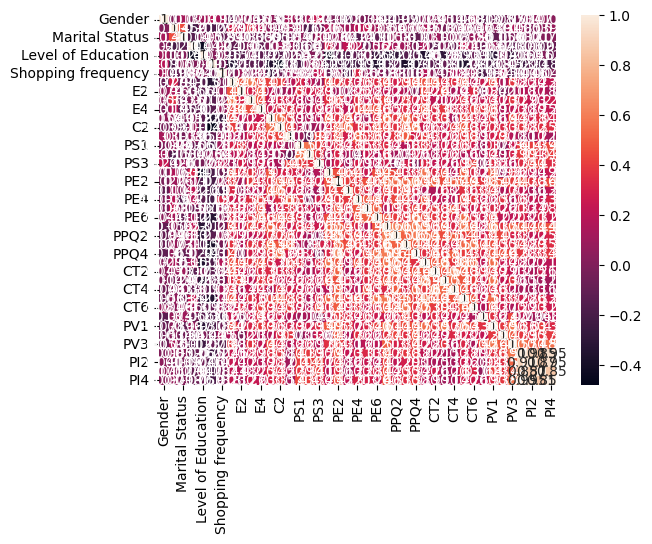

In [11]:
Vars = dataset

correlation = Vars.corr()

sns.heatmap(correlation, annot=True)

###Heatmaps

As there are alot of columns(41), a heatmap of the entire dataset would not be much help. I will be splitting them up for easier visibility and compare their correlation with purchase intent.

In [12]:
Empathy = ['E1','E2','E3','E4','PI1','PI2','PI3','PI4']

In [13]:
Convenience = ['C1','C2','C3','PI1','PI2','PI3','PI4']

In [14]:
Price_Sensitivity = ['PS1','PS2','PS3','PI1','PI2','PI3','PI4']

In [15]:
Physical_Environment = ['PE1','PE2','PE3','PE4','PE5','PE6','PI1','PI2','PI3','PI4']

In [16]:
Perceived_Product_Quality = ['PPQ1','PPQ2','PPQ3','PPQ4','PI1','PI2','PI3','PI4']

In [17]:
Customer_Trust = ['CT1','CT2','CT3','CT4','CT5','CT6','CT7','PI1','PI2','PI3','PI4']

In [18]:
Perceived_Value =  ['PV1','PV2','PV3','PI1','PI2','PI3','PI4']

In [19]:
Empathy_vars = dataset[Empathy]

In [20]:
Convenience_vars = dataset[Convenience]

In [21]:
Price_Sensitivity_vars = dataset[Price_Sensitivity]

In [22]:
Physical_Environment_vars = dataset[Physical_Environment]

In [23]:
Perceived_Product_Quality_vars = dataset[Perceived_Product_Quality]

In [24]:
Customer_Trust_vars = dataset[Customer_Trust]

In [25]:
Perceived_Value_vars = dataset[Perceived_Value]

<Axes: >

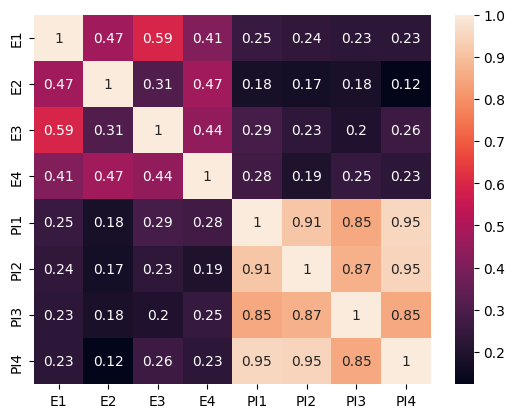

In [26]:
correlation1 = Empathy_vars.corr()

sns.heatmap(correlation1, annot=True)

<Axes: >

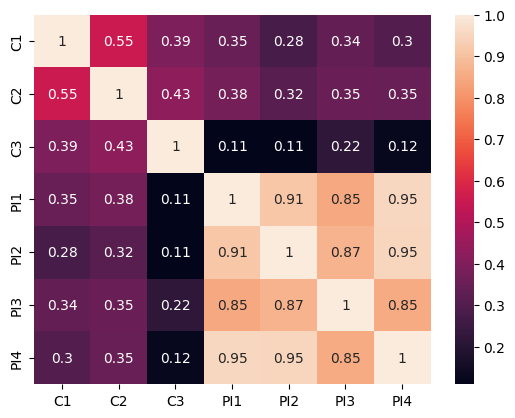

In [27]:
correlation2 = Convenience_vars.corr()

sns.heatmap(correlation2, annot=True)

<Axes: >

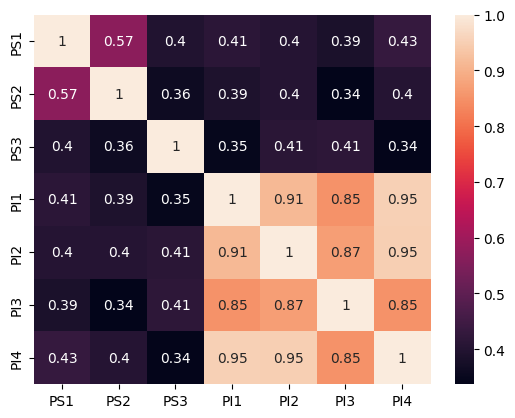

In [28]:
correlation3 = Price_Sensitivity_vars.corr()

sns.heatmap(correlation3, annot=True)

<Axes: >

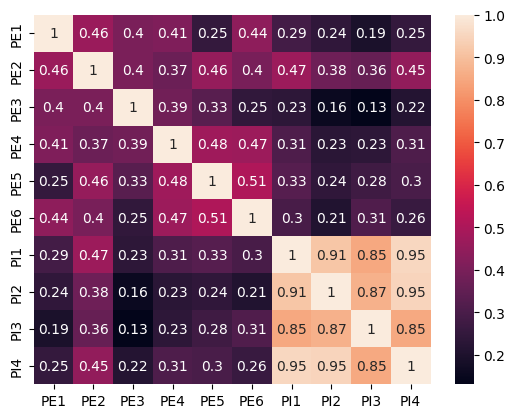

In [29]:
correlation4 = Physical_Environment_vars.corr()

sns.heatmap(correlation4, annot=True)

<Axes: >

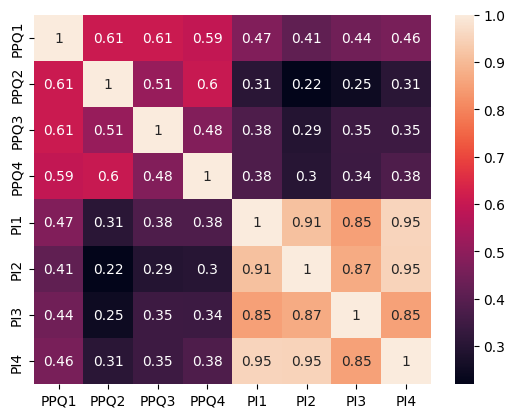

In [30]:
correlation5 = Perceived_Product_Quality_vars.corr()

sns.heatmap(correlation5, annot=True)

<Axes: >

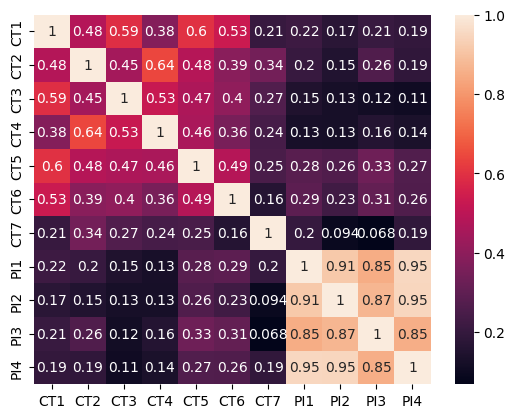

In [31]:
correlation6 = Customer_Trust_vars.corr()

sns.heatmap(correlation6, annot=True)

<Axes: >

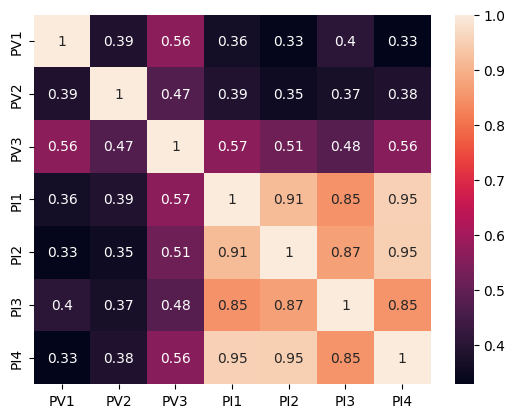

In [32]:
correlation7 = Perceived_Value_vars.corr()

sns.heatmap(correlation7, annot=True)

The heatmaps do not give a lot of insight, they mostly gave the same results and none of them indicate a very high correlation.

"Percieved Value"'s, PV3(In this grocery store, compared to other stores
outside the township, I can save money, variable) is the only variable that shows a correlation of/higher than 0.5 with "Purchase Intent" PI1, PI2 and PI4.

I will widen the range to a correlation from 0.4.

##Pair Plots

After looking at the variables with a higher correlation, I will be presenting them in pairplots to visualize their relationships.

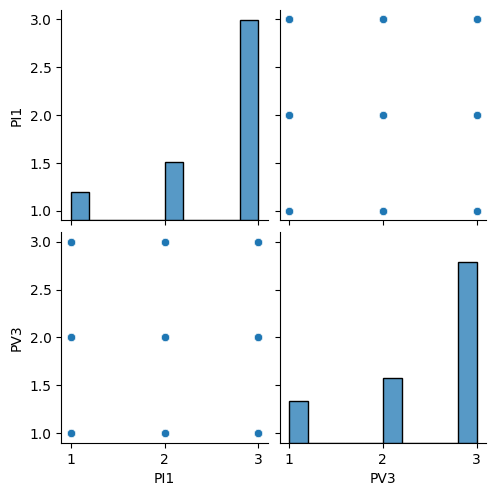

In [33]:
#The variables with the highest correlation first
sns.pairplot(dataset[['PI1','PV3']])

The pairplot does not seem to be the best visualizer, so I'll be moving on to scatterplots.

##ScatterPlots

In [34]:
dataset_testing = dataset.copy()

In [35]:
#Again starting from the variables with the highest correlation

# Encoding categorical data
dataset_testing['PI1_encoded'] = pd.factorize(dataset_testing['PI1'])[0]
dataset_testing['PV3_encoded'] = pd.factorize(dataset_testing['PV3'])[0]
dataset_testing['Gender_encoded'] = pd.factorize(dataset_testing['Gender'])[0]

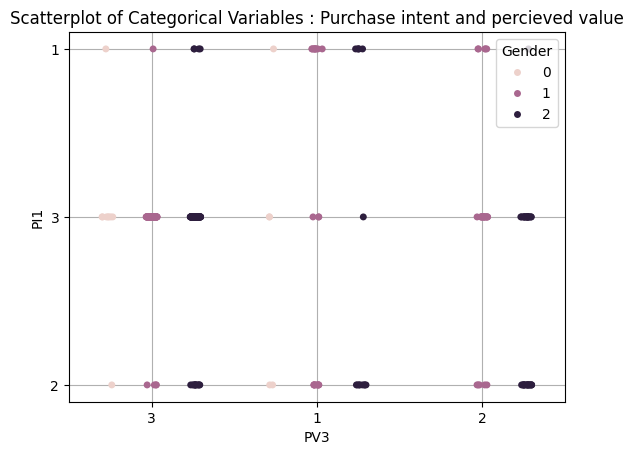

In [36]:
sns.stripplot(data=dataset_testing, x='PV3_encoded', y='PI1_encoded', jitter=True, hue='Gender_encoded', dodge=True, marker='o')
plt.xticks(ticks=range(len(dataset_testing['PV3'].unique())), labels=dataset_testing['PV3'].unique())
plt.yticks(ticks=range(len(dataset_testing['PI1'].unique())), labels=dataset_testing['PI1'].unique())
plt.title('Scatterplot of Categorical Variables : Purchase intent and percieved value')
plt.xlabel('PV3')
plt.ylabel('PI1')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

##**Creating a Minimum Dataset**

After doing some research, I realized tabulating categorical variables across one another would be the best way to visualize their relationships.
[Source](https://colab.research.google.com/github/dlsun/pods/blob/master/02-Categorical-Data/2.2%20Two%20Categorical%20Variables%20and%20Cross-Tabulations.ipynb#scrollTo=tfPjloEx5T36)

##Cross Tabulation/Contingency Tables

In [37]:
#PV3 - In this grocery store, compared to other stores outside the township, I can save money
#PI1 - I intend to purchase from this grocery store
pd.crosstab(dataset['PI1'], dataset['PV3'])

PV3,1,2,3
PI1,,,
1,16,6,6
2,19,22,16
3,6,35,155


In [38]:
#PV3 - In this grocery store, compared to other stores outside the township, I can save money
#PI2 - I would like to repeat my experience in this kind of grocery store
pd.crosstab(dataset['PI2'], dataset['PV3'])

PV3,1,2,3
PI2,,,
1,12,6,8
2,24,18,16
3,5,39,153


In [39]:
#PV3 - In this grocery store, compared to other stores outside the township, I can save money
#PI4 -  would recommend purchasing in this grocery store to others
pd.crosstab(dataset['PI4'], dataset['PV3'])

PV3,1,2,3
PI4,,,
1,15,6,9
2,22,21,12
3,4,36,156


In [40]:
#PV3 - In this grocery store, compared to other stores outside the township, I can save money
#PI3 -  I would purchase from this grocery store in the future
pd.crosstab(dataset['PI3'], dataset['PV3'])

PV3,1,2,3
PI3,,,
1,14,10,14
2,21,20,12
3,6,33,151


In [41]:
#Does the want to recommend a store to others and purchase intent share a strong correlation?

#PI1 - I intend to purchase from this grocery store
#PI3 -  I would purchase from this grocery store in the future
pd.crosstab(dataset['PI1'], dataset['PI3'])

PI3,1,2,3
PI1,,,
1,24,4,0
2,14,34,9
3,0,15,181


Percieved value, specifically whether someone believes they're saving money, clearly has a strong relationship with their purchase intent and whether they'd recommend this store or not.<br/>
I will be using this in my minimum dataset.



This also gives me an indication that the variables with high correlation with purchase intent would also give the same results. I will be moving on to measuring the significance of the demographic data in the questionnaire 'Section A'.

In [42]:
#Testing whether gender has an influence on purchase intent through probability

joint_intent_gender = pd.crosstab(dataset['PV1'], dataset['Gender'],
                                    normalize=True)
print("Gender : 1 - Male, 2 - Female, 3 - Rather not say")
print()
joint_intent_gender

Gender : 1 - Male, 2 - Female, 3 - Rather not say



Gender,1,2,3
PV1,,,
1,0.120996,0.131673,0.021352
2,0.131673,0.131673,0.017794
3,0.220641,0.213523,0.010676


As there was a equal distribution of gender, it does not have a big influence on purchase intent. I will be leaving that out of my minimal dataset calculations, but include it as a filter for interest sake.

<ipython-input-43-81ce57bd3614>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employment Status', y='PI1', data=dataset,palette='Blues_d') #, hue = 'Gender'


Marital status: 1 - Married, 2 - Single, 3 - Rather not say



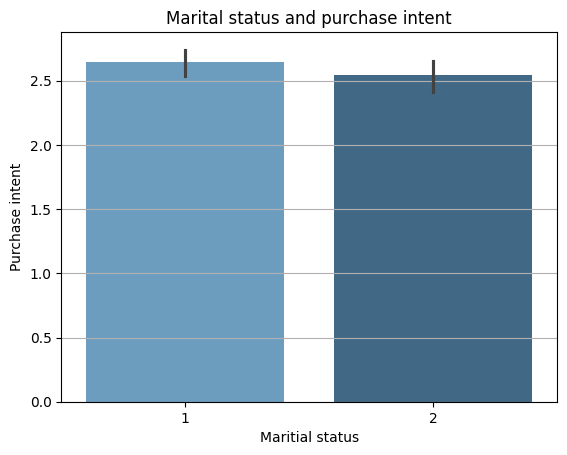

In [43]:
#Maritial status accross purchase intent(featuring gender)

sns.barplot(x='Employment Status', y='PI1', data=dataset,palette='Blues_d') #, hue = 'Gender'
plt.title('Marital status and purchase intent')
plt.xlabel('Maritial status')
plt.ylabel('Purchase intent')
plt.grid(axis='y')

print("Marital status: 1 - Married, 2 - Single, 3 - Rather not say")
#print("Gender: 1 - Male, 2 - Female, 3 - Rather not say")
print()
plt.show()

Again the data is relatively clean, thus demographical information like this does not have a big influence on purchase intent. I will be leaving that out of my minimal dataset calculations, but include it as a filter for interest sake.

<ipython-input-44-af956f73c145>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Level of Education', y='PI1', data=dataset,palette='Blues_d')#, hue = 'Gender'


Level of Education : 1 - No formal education, 2 - Basic Education, 3 - Diploma, 4 - Degree , 5 - Postgraduate degree



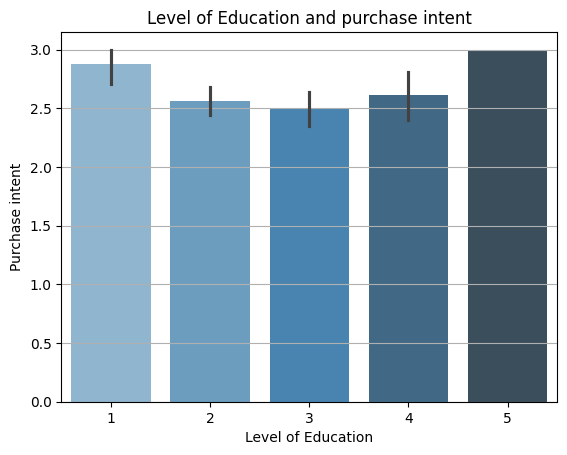

In [44]:
#Purchase intent among different levels of education

sns.barplot(x='Level of Education', y='PI1', data=dataset,palette='Blues_d')#, hue = 'Gender'
plt.title('Level of Education and purchase intent')
plt.xlabel('Level of Education')
plt.ylabel('Purchase intent')
plt.grid(axis='y')

print("Level of Education : 1 - No formal education, 2 - Basic Education, 3 - Diploma, 4 - Degree , 5 - Postgraduate degree")
#print("Gender: 1 - Male, 2 - Female, 3 - Rather not say")
print()
plt.show()

Purchase intent seems to be highest among people with a postgraduate degree, but second highest in people with no formal education. This does not allow one to draw any conclusions without the influence of other variables. I will have to use this as a filter as well.

#**Conclusion**

My most valuable observations were achieved through correlation matrixes(heat maps), where I looked at each variable's correlation with purchase intent. I singled out all variables with a correlation of 0.4 and higher.

###**Minimum Dataset**
The variables I have chosen are as follows:<br/>
<br/>
PS1 - I will continue to buy from the grocery store
even if prices increase <br/>
PS2 - I am willing to pay a higher price for the benefit of having the grocery store located close to me<br/>
PS3 - I am willing to stick with the grocery store and
not travel to other competitors outside the township who might offer reasonable prices <br/>
PE2 - The grocery store provides a clean shopping environment <br/>
PPQ1 - The overall quality of products I buy from the grocery store is good <br/>
PV1 - The grocery store products have a good value for money <br/>
PV3 - The grocery store products are affordable <br/>

The variables and their correlation is shown in the table below.

In [45]:
from prettytable import PrettyTable

#code from https://chatgpt.com/
# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.title = "Minimum dataset chosen variables"
table.field_names = ["Variable", "PI1", "P12", "P13", "P14"]
table.add_row(["PS1", 0.41, 0.4, "Out of Bounds", 0.43])
table.add_row(["PS2", "Out of Bounds", 0.4, "Out of Bounds", 0.4])
table.add_row(["PS3", "Out of Bounds", 0.41, 0.41, "Out of Bounds"])
table.add_row(["PE2", 0.47, "Out of Bounds", "Out of Bounds", 0.45])
table.add_row(["PPQ1", 0.47, 0.41, 0.44, 0.46])
table.add_row(["PV1", "Out of Bounds", "Out of Bounds", 0.4, 0])
table.add_row(["PV3", 0.57, 0.51, 0.48, 0.56])

# Print the table
print(table)


+--------------------------------------------------------------------------+
|                     Minimum dataset chosen variables                     |
+----------+---------------+---------------+---------------+---------------+
| Variable |      PI1      |      P12      |      P13      |      P14      |
+----------+---------------+---------------+---------------+---------------+
|   PS1    |      0.41     |      0.4      | Out of Bounds |      0.43     |
|   PS2    | Out of Bounds |      0.4      | Out of Bounds |      0.4      |
|   PS3    | Out of Bounds |      0.41     |      0.41     | Out of Bounds |
|   PE2    |      0.47     | Out of Bounds | Out of Bounds |      0.45     |
|   PPQ1   |      0.47     |      0.41     |      0.44     |      0.46     |
|   PV1    | Out of Bounds | Out of Bounds |      0.4      |       0       |
|   PV3    |      0.57     |      0.51     |      0.48     |      0.56     |
+----------+---------------+---------------+---------------+---------------+

Along with the variables above, I will include all the demographic information to use as filters.

In [46]:
#For accurate column selection without scrolling all the way up ;p
dataset.columns

Index(['Gender', 'Age', 'Marital Status', 'Employment Status',
       'Level of Education', 'Regular Customer', 'Shopping frequency', 'E1',
       'E2', 'E3', 'E4', 'C1', 'C2', 'C3', 'PS1', 'PS2', 'PS3', 'PE1', 'PE2',
       'PE3', 'PE4', 'PE5', 'PE6', 'PPQ1', 'PPQ2', 'PPQ3', 'PPQ4', 'CT1',
       'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'CT7', 'PV1', 'PV2', 'PV3', 'PI1',
       'PI2', 'PI3', 'PI4'],
      dtype='object')

In [47]:
# Select specific columns
new_dataset = dataset[['Gender', 'Age', 'Marital Status', 'Employment Status', 'Level of Education', 'Regular Customer', 'Shopping frequency', 'PE2', 'PI1','PI2', 'PI3', 'PI4', 'PPQ1','PS1', 'PS2', 'PS3', 'PV1', 'PV3']]

new_dataset['Gender'] = new_dataset['Gender'].replace({1: 'Male', 2: 'Female', 3: 'Unspecified'})
new_dataset['Marital Status'] = new_dataset['Marital Status'].replace({1: 'Married', 2: 'Single', 3: 'Unspecified'})
new_dataset['Age'] = new_dataset['Age'].replace({1: '18 - 22', 2: '23 - 28', 3: '29 - 35', 4: '36 - 49', 5: '50 - 65'})
new_dataset['Employment Status'] = new_dataset['Employment Status'].replace({1: 'Employed', 2: 'Unemployed'})
new_dataset['Level of Education'] = new_dataset['Level of Education'].replace({1: 'No formal education', 2: 'Basic Education', 3: 'Diploma', 4: 'Degree', 5: 'Postgraduate degree'})
new_dataset['Regular Customer'] = new_dataset['Regular Customer'].replace({1: 'Yes', 2: 'No'})
new_dataset['Shopping frequency'] = new_dataset['Shopping frequency'].replace({1: '1 - 2', 2: '2 - 3', 3: '3 - 4', 3: '4 - 5', 3: '5 - 6', 3: '6 - 7'})

<ipython-input-47-215dfd2f0d6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Gender'] = new_dataset['Gender'].replace({1: 'Male', 2: 'Female', 3: 'Unspecified'})
<ipython-input-47-215dfd2f0d6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Marital Status'] = new_dataset['Marital Status'].replace({1: 'Married', 2: 'Single', 3: 'Unspecified'})
<ipython-input-47-215dfd2f0d6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [48]:
# Save the new DataFrame to a CSV file
new_dataset.to_csv('report_dataset.csv', index=False)

# Download the file
files.download('report_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>